In [ ]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance
from model import Net, nn
from torchvision import datasets, transforms
from torchsummary import summary

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

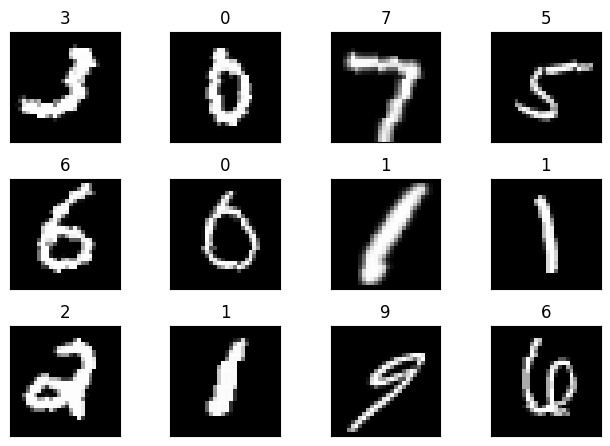

In [6]:
plot_dataset_sample(train_loader)

In [ ]:
device = torch.device("cuda" if cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4352 Batch_id=117 Accuracy=42.60: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [03:52<00:00,  1.97s/it]


Test set: Average loss: 0.2832, Accuracy: 9150/10000 (91.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1168 Batch_id=117 Accuracy=93.40: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [03:38<00:00,  1.85s/it]


Test set: Average loss: 0.0901, Accuracy: 9724/10000 (97.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0624 Batch_id=117 Accuracy=96.31: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [03:41<00:00,  1.88s/it]


Test set: Average loss: 0.0671, Accuracy: 9781/10000 (97.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0780 Batch_id=117 Accuracy=97.09: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [04:05<00:00,  2.08s/it]


Test set: Average loss: 0.0571, Accuracy: 9817/10000 (98.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0595 Batch_id=117 Accuracy=97.61: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [03:40<00:00,  1.87s/it]


Test set: Average loss: 0.0430, Accuracy: 9865/10000 (98.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0537 Batch_id=117 Accuracy=97.98: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [03:40<00:00,  1.87s/it]


Test set: Average loss: 0.0370, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0549 Batch_id=117 Accuracy=98.13: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [10:44<00:00,  5.46s/it]


Test set: Average loss: 0.0330, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0533 Batch_id=117 Accuracy=98.38: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [03:50<00:00,  1.95s/it]


Test set: Average loss: 0.0312, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0510 Batch_id=33 Accuracy=98.47:  29%|██████████████████████████████████▎                                                                                    | 34/118 [01:05<02:37,  1.87s/it]

Text(0.5, 1.0, 'Test Accuracy')

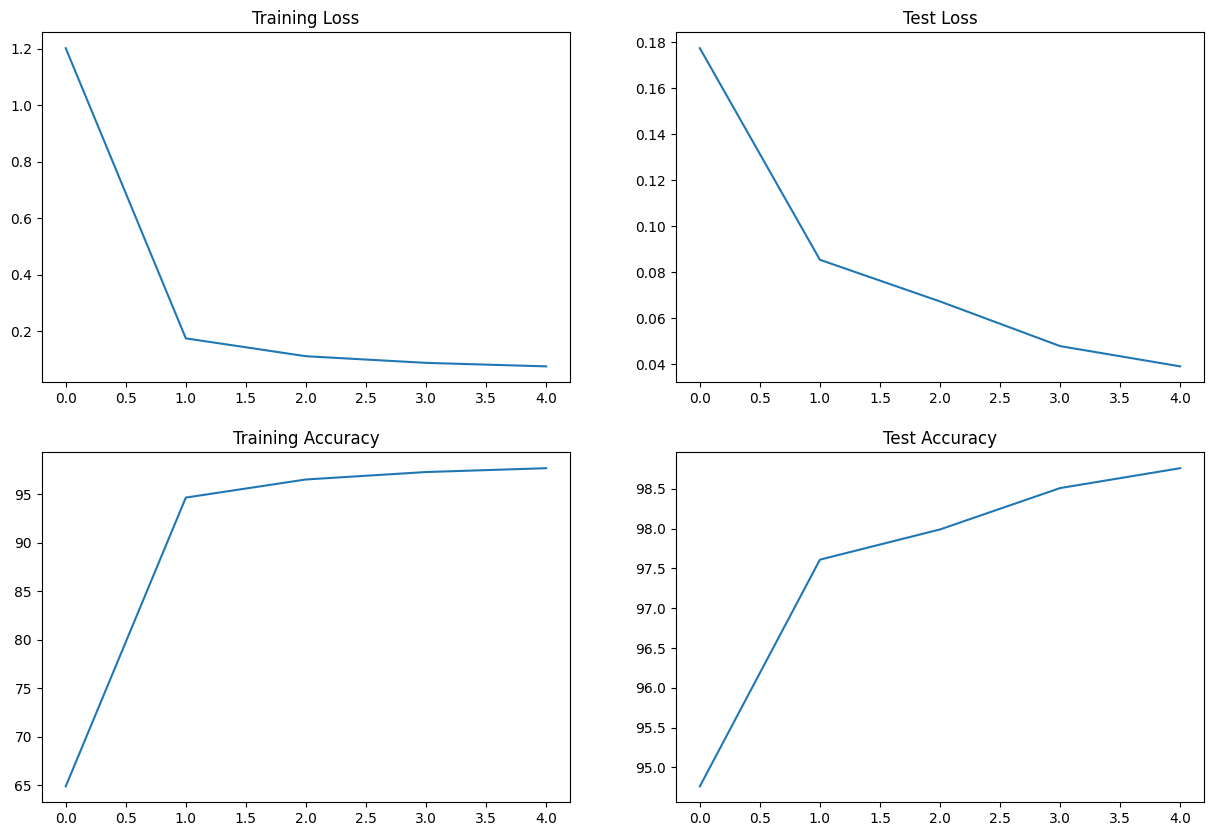

In [7]:
plot_model_performance()

In [ ]:
device = torch.device("cuda" if cuda else "cpu")
model = Net().to(device)
#summary(model, input_size=(1, 28, 28))
Net.summary(device, (1, 28, 28))